In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_path_2020 = '/Users/melvinakash/Desktop/NCI/ric/datasets/merged_2020.csv'
dataset_path_2021 = '/Users/melvinakash/Desktop/NCI/ric/datasets/merged_2021.csv'
dataset_path_2022 = '/Users/melvinakash/Desktop/NCI/ric/datasets/merged_2022.csv'

# Reading data using pandas

In [3]:
pd.set_option('display.max_columns',None)

data_2020 = pd.read_csv(dataset_path_2020)
data_2021 = pd.read_csv(dataset_path_2021)
data_2022 = pd.read_csv(dataset_path_2022)

# Concatenate the DataFrames vertically (along rows)

In [4]:
df = pd.concat([data_2020, data_2021 , data_2022], ignore_index=True)

In [5]:
df

,a_ref,c_id,c_class,c_sex,c_agegroup,c_sever,c_loc,c_move,c_school,c_pcv,c_pedinj,c_vtype,a_year,a_ref.1,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,a_gd1,a_gd2,a_ctype,a_speed,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene,a_ref.2,v_type,v_tow,v_man,v_loc,v_junc,v_skid,v_hit,v_leave,v_hitoff,v_impact,v_sex,v_agegroup,v_hitr,v_forreg
0,1,1,1,1,3,3,,,8,,,8,2020,1,ARND,3,1,1,WED,1,1,0,55,346543,367965,13,40,,,,,,,,,,,1,8,1,18,3,,,,,,2,1,3,1,
1,2,1,1,1,7,3,,,8,,,8,2020,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,,,,,,,,,,,2,8,1,2,4,,,,,,2,3,9,1,
2,2,1,1,1,7,3,,,8,,,8,2020,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,,,,,,,,,,,2,8,1,2,4,,,,,,5,3,9,1,
3,2,1,1,1,7,3,,,8,,,8,2020,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,,,,,,,,,,,2,8,1,2,4,,,,,,4,3,9,1,
4,2,1,1,1,7,3,,,8,,,8,2020,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,,,,,,,,,,,2,8,1,18,4,,,,,,2,1,7,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,4703,1,1,1,4,2,1,1,8,1,2,8,2021,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,12,7,1,1,6,1,2,1,1,1,4703,8,1,7,3,4,1,1,1,1,1,1,4,1,1
40714,4703,1,1,1,4,2,1,1,8,1,2,8,2021,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,12,7,1,1,6,1,2,1,1,1,4703,8,1,7,3,4,6,1,4,5,2,1,4,1,1
40715,4703,2,3,1,4,3,1,1,8,1,2,8,2021,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,12,7,1,1,6,1,2,1,1,1,4703,8,1,7,3,4,1,1,1,1,1,1,4,1,1
40716,4703,2,3,1,4,3,1,1,8,1,2,8,2021,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,12,7,1,1,6,1,2,1,1,1,4703,8,1,7,3,4,6,1,4,5,2,1,4,1,1


# Finding the missing values

In [6]:
df.replace(' ', np.nan, inplace=True)
missing_values_count = df.isnull().sum()
print(missing_values_count)

a_ref             0
c_id              0
c_class           0
c_sex             0
c_agegroup        0
c_sever           0
c_loc         34270
c_move        34270
c_school          0
c_pcv         34270
c_pedinj      38820
c_vtype        1150
a_year            0
a_ref.1           0
a_District        0
a_type            0
a_veh             0
a_cas             0
a_wkday           0
a_day             0
a_month           0
a_hour            0
a_min             0
a_gd1             0
a_gd2             0
a_ctype           0
a_speed           0
a_jdet        34270
a_jcont       34270
a_pedhum      34270
a_pedphys     34270
a_light       34270
a_weat        34270
a_roadsc      34270
a_speccs      34270
a_chaz        34270
a_scene       34270
a_ref.2           0
v_type            0
v_tow             0
v_man             0
v_loc             0
v_junc        34270
v_skid        34270
v_hit         34270
v_leave       34270
v_hitoff      34270
v_impact          0
v_sex             0
v_agegroup        0


# Visualize missing data patterns

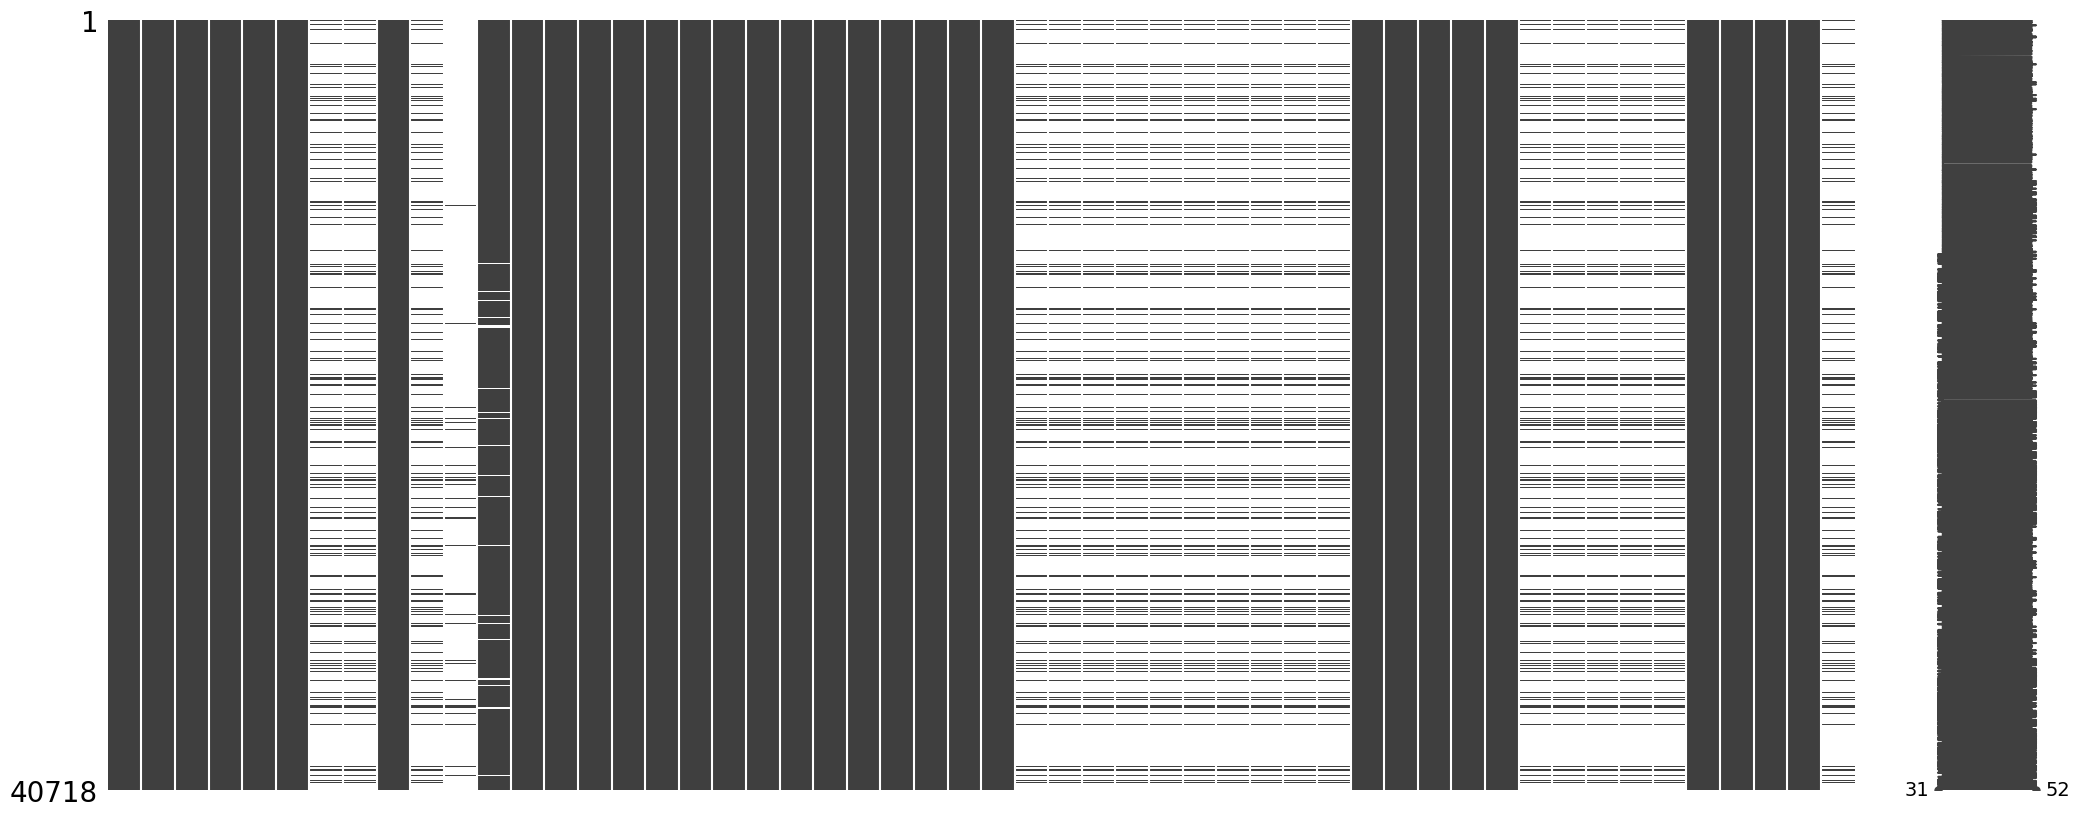

In [28]:
import missingno as msno
 
msno.matrix(df)
 
# Perform Little's MCAR test
missing_data = df.isnull()
missing_data = missing_data.sum()
missing_data = missing_data[missing_data > 0]
missing_data = missing_data.to_frame()
missing_data.columns = ['count']
missing_data['missing_percentage'] = (missing_data['count'] / len(df)) * 100

In [7]:
df.columns

Index(['a_ref', 'c_id', 'c_class', 'c_sex', 'c_agegroup', 'c_sever', 'c_loc',
       'c_move', 'c_school', 'c_pcv', 'c_pedinj', 'c_vtype', 'a_year',
       'a_ref.1', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday', 'a_day',
       'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed',
       'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light', 'a_weat',
       'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene', 'a_ref.2', 'v_type',
       'v_tow', 'v_man', 'v_loc', 'v_junc', 'v_skid', 'v_hit', 'v_leave',
       'v_hitoff', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'v_forreg'],
      dtype='object')

In [8]:
#target variable distribution
df[['a_type']].value_counts()

a_type
3         34270
2          5826
1           622
dtype: int64

# Histograms

array([[<AxesSubplot: title={'center': 'a_ref'}>,
        <AxesSubplot: title={'center': 'c_id'}>,
        <AxesSubplot: title={'center': 'c_class'}>,
        <AxesSubplot: title={'center': 'c_sex'}>,
        <AxesSubplot: title={'center': 'c_agegroup'}>],
       [<AxesSubplot: title={'center': 'c_sever'}>,
        <AxesSubplot: title={'center': 'c_school'}>,
        <AxesSubplot: title={'center': 'a_year'}>,
        <AxesSubplot: title={'center': 'a_ref.1'}>,
        <AxesSubplot: title={'center': 'a_type'}>],
       [<AxesSubplot: title={'center': 'a_veh'}>,
        <AxesSubplot: title={'center': 'a_cas'}>,
        <AxesSubplot: title={'center': 'a_day'}>,
        <AxesSubplot: title={'center': 'a_month'}>,
        <AxesSubplot: title={'center': 'a_hour'}>],
       [<AxesSubplot: title={'center': 'a_min'}>,
        <AxesSubplot: title={'center': 'a_gd1'}>,
        <AxesSubplot: title={'center': 'a_gd2'}>,
        <AxesSubplot: title={'center': 'a_ctype'}>,
        <AxesSubplot: title

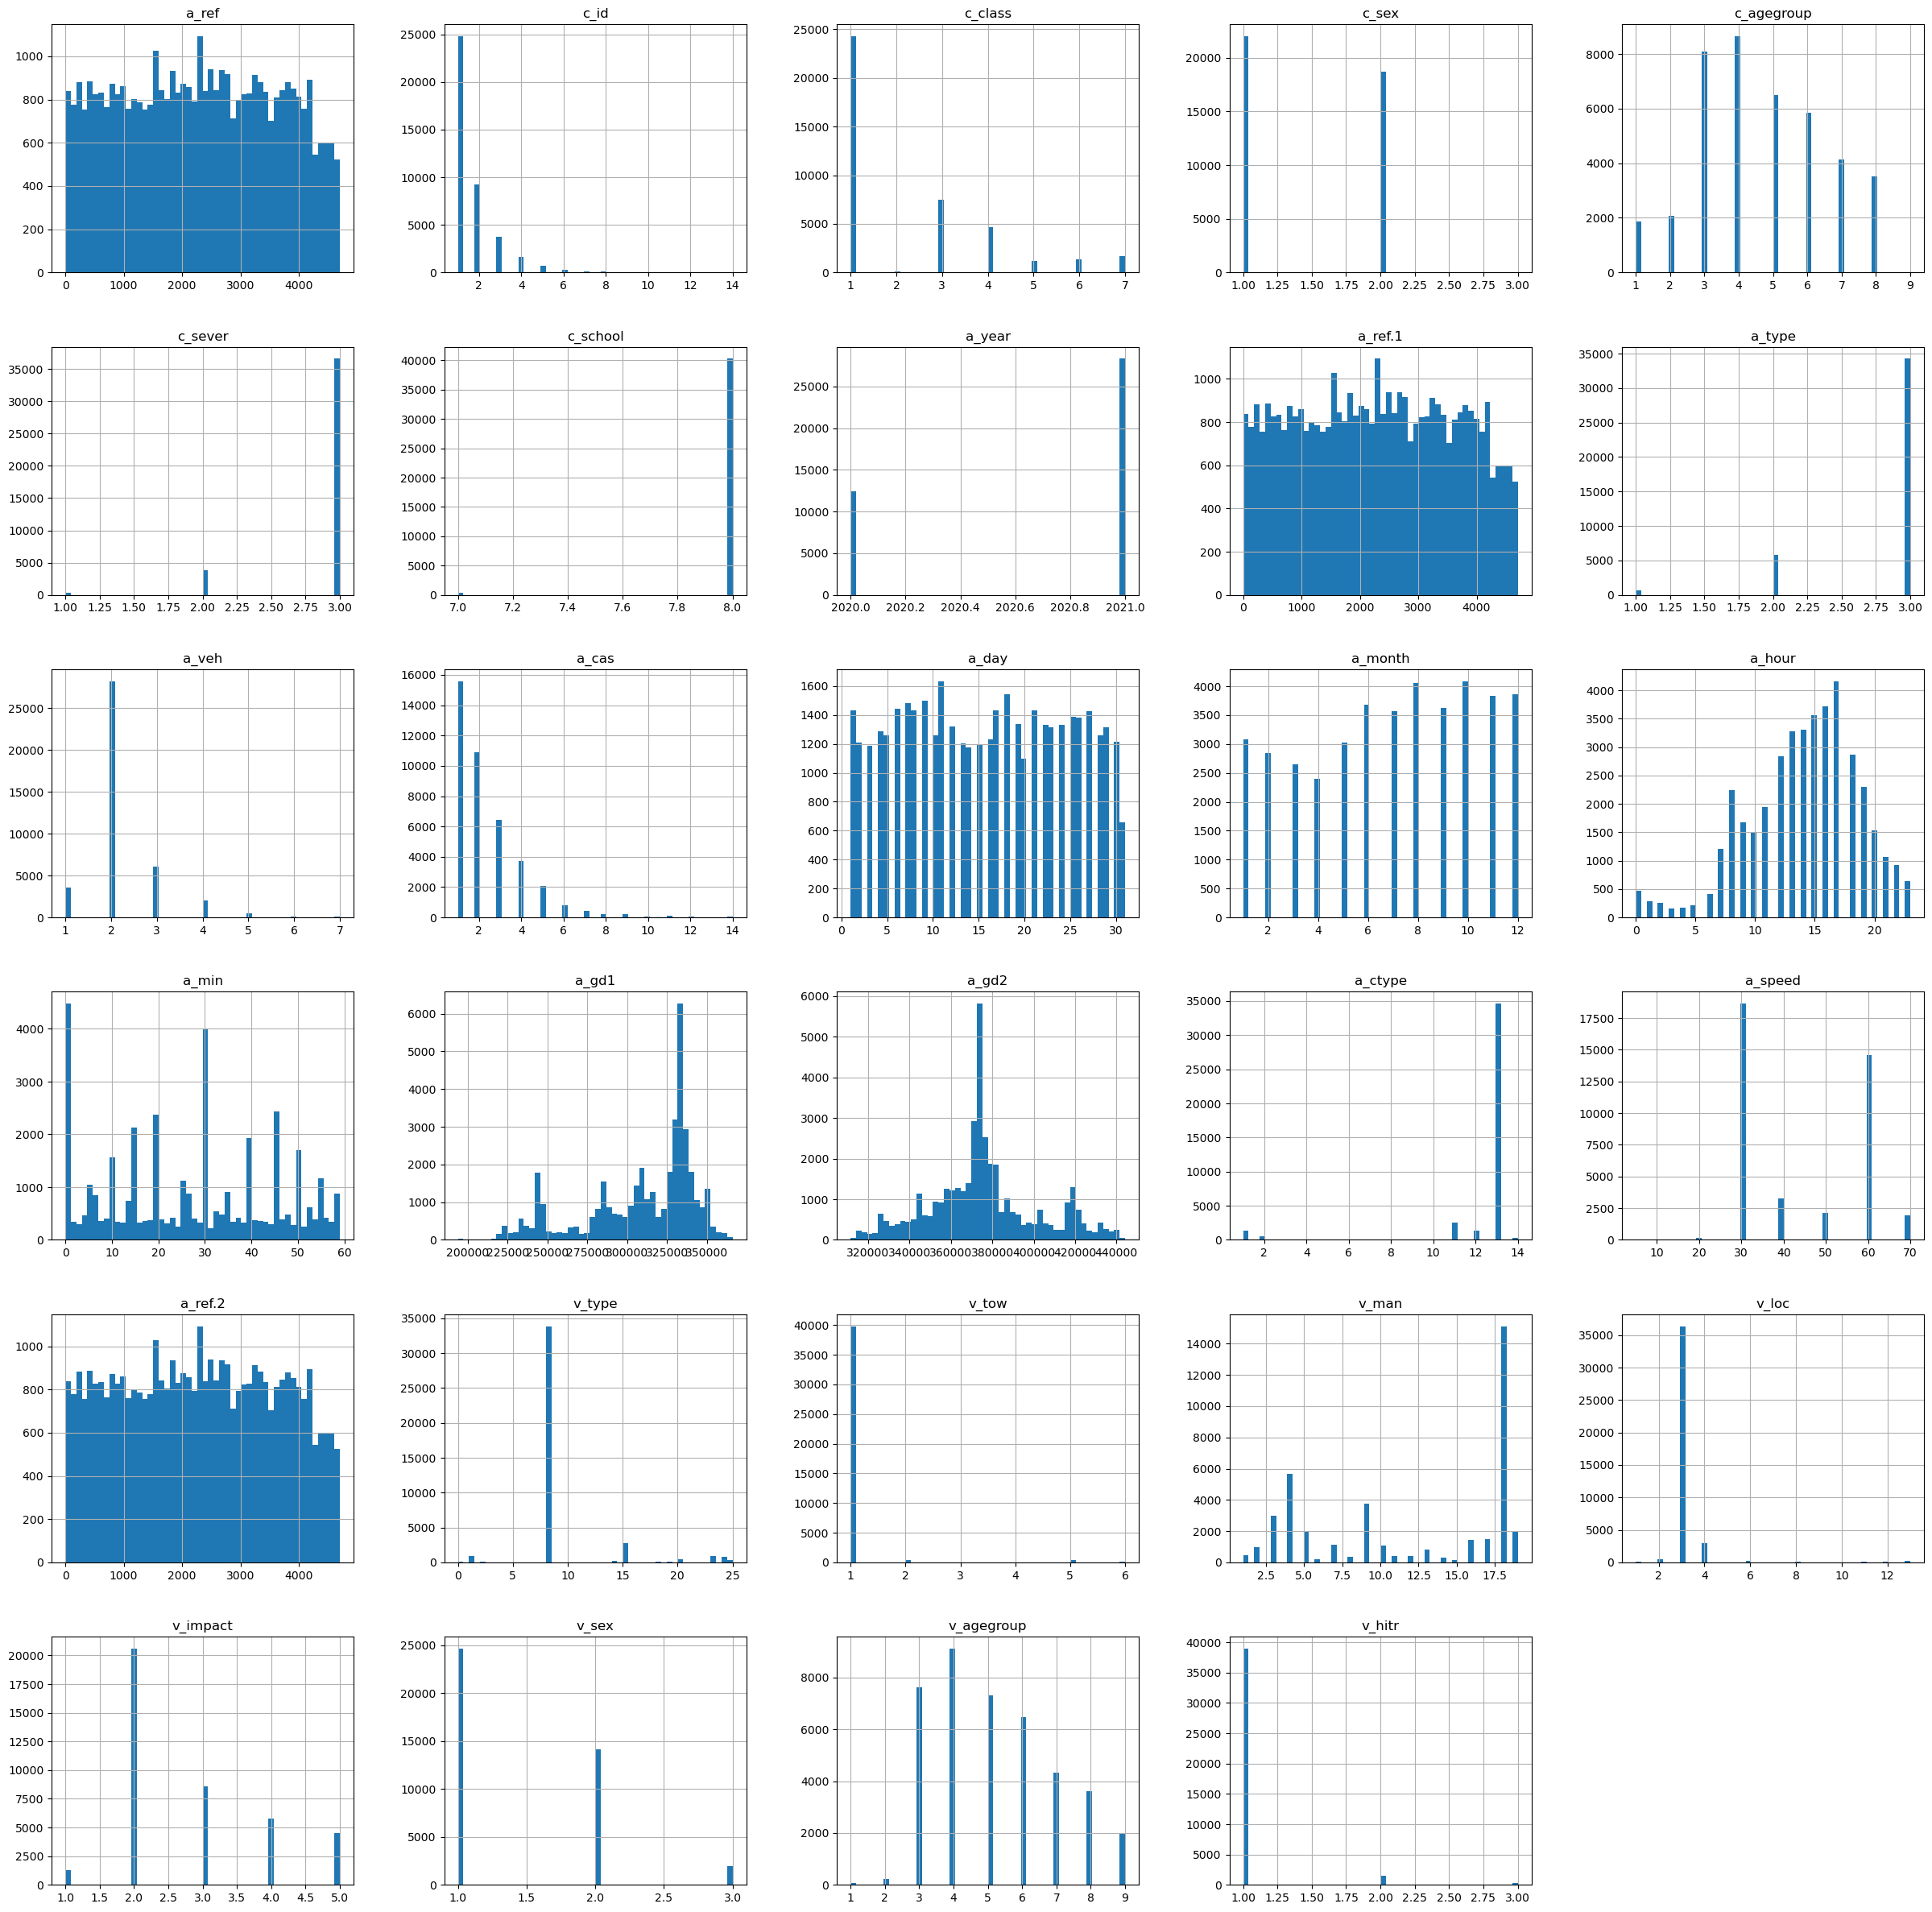

In [9]:
#displaying histograms for all columns
df.hist(bins = 50, figsize = (30,30))

In [10]:
#taking subset of necessary data after eval of columns
data_subset = df[[ 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday',
       'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype',
       'a_speed', 'c_class', 'c_sex', 'c_agegroup',
     'c_school', 'c_vtype', 'v_type', 'v_tow', 'v_man',
       'v_loc',  'v_impact',
       'v_sex', 'v_agegroup', 'v_hitr']]
data_subset

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,a_gd1,a_gd2,a_ctype,a_speed,c_class,c_sex,c_agegroup,c_school,c_vtype,v_type,v_tow,v_man,v_loc,v_impact,v_sex,v_agegroup,v_hitr
0,1,ARND,3,1,1,WED,1,1,0,55,346543,367965,13,40,1,1,3,8,8,8,1,18,3,2,1,3,1
1,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,1,1,7,8,8,8,1,2,4,2,3,9,1
2,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,1,1,7,8,8,8,1,2,4,5,3,9,1
3,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,1,1,7,8,8,8,1,2,4,4,3,9,1
4,2,BELC,3,4,1,WED,1,1,2,20,335920,374406,13,30,1,1,7,8,8,8,1,18,4,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,1,1,4,8,8,8,1,7,3,1,1,4,1
40714,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,1,1,4,8,8,8,1,7,3,2,1,4,1
40715,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,3,1,4,8,8,8,1,7,3,1,1,4,1
40716,4703,ANTN,2,2,2,WED,15,9,23,53,325598,378737,13,60,3,1,4,8,8,8,1,7,3,2,1,4,1


In [11]:
#output for visualisation
data_subset.to_csv("final_viz_output.csv", index=False)

In [12]:
data_subset.dtypes

a_ref          int64
a_District    object
a_type         int64
a_veh          int64
a_cas          int64
a_wkday       object
a_day          int64
a_month        int64
a_hour         int64
a_min          int64
a_gd1          int64
a_gd2          int64
a_ctype        int64
a_speed        int64
c_class        int64
c_sex          int64
c_agegroup     int64
c_school       int64
c_vtype       object
v_type         int64
v_tow          int64
v_man          int64
v_loc          int64
v_impact       int64
v_sex          int64
v_agegroup     int64
v_hitr         int64
dtype: object

In [13]:
data_subset.describe()

,a_ref,a_type,a_veh,a_cas,a_day,a_month,a_hour,a_min,a_gd1,a_gd2,a_ctype,a_speed,c_class,c_sex,c_agegroup,c_school,v_type,v_tow,v_man,v_loc,v_impact,v_sex,v_agegroup,v_hitr
count,40718.000000,40718.000000,40718.000000,40718.000000,40718.00000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.00000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000,40718.000000
mean,2288.127290,2.826367,2.228449,2.388551,15.70114,6.951496,14.075593,26.900314,309327.244708,375548.797510,12.310428,44.405914,2.244094,1.459797,4.66101,7.989611,9.273859,1.060293,11.914952,3.192151,2.793900,1.442974,5.207820,1.050297
std,1313.259701,0.417182,0.794580,1.732524,8.76784,3.415239,4.627286,17.648057,34714.396936,25928.891294,2.479021,14.809727,1.737204,0.499126,1.84927,0.101395,4.211776,0.464972,6.343509,1.079731,1.081932,0.585141,1.777278,0.250009
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,193902.000000,311470.000000,1.000000,5.000000,1.000000,1.000000,1.00000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1160.250000,3.000000,2.000000,1.000000,8.00000,4.000000,11.000000,12.000000,287925.250000,360937.000000,13.000000,30.000000,1.000000,1.000000,3.00000,8.000000,8.000000,1.000000,5.000000,3.000000,2.000000,1.000000,4.000000,1.000000
50%,2295.000000,3.000000,2.000000,2.000000,16.00000,7.000000,15.000000,28.000000,323908.000000,373915.500000,13.000000,40.000000,1.000000,1.000000,4.00000,8.000000,8.000000,1.000000,14.000000,3.000000,2.000000,1.000000,5.000000,1.000000
75%,3395.000000,3.000000,2.000000,3.000000,23.00000,10.000000,17.000000,42.000000,334239.000000,386529.000000,13.000000,60.000000,3.000000,2.000000,6.00000,8.000000,8.000000,1.000000,18.000000,3.000000,4.000000,2.000000,6.000000,1.000000
max,4704.000000,3.000000,7.000000,14.000000,31.00000,12.000000,23.000000,59.000000,366088.000000,444144.000000,14.000000,70.000000,7.000000,3.000000,9.00000,8.000000,25.000000,6.000000,19.000000,13.000000,5.000000,3.000000,9.000000,3.000000


# Histograms of data subset 

array([[<AxesSubplot: title={'center': 'a_ref'}>,
        <AxesSubplot: title={'center': 'a_type'}>,
        <AxesSubplot: title={'center': 'a_veh'}>,
        <AxesSubplot: title={'center': 'a_cas'}>,
        <AxesSubplot: title={'center': 'a_day'}>],
       [<AxesSubplot: title={'center': 'a_month'}>,
        <AxesSubplot: title={'center': 'a_hour'}>,
        <AxesSubplot: title={'center': 'a_min'}>,
        <AxesSubplot: title={'center': 'a_gd1'}>,
        <AxesSubplot: title={'center': 'a_gd2'}>],
       [<AxesSubplot: title={'center': 'a_ctype'}>,
        <AxesSubplot: title={'center': 'a_speed'}>,
        <AxesSubplot: title={'center': 'c_class'}>,
        <AxesSubplot: title={'center': 'c_sex'}>,
        <AxesSubplot: title={'center': 'c_agegroup'}>],
       [<AxesSubplot: title={'center': 'c_school'}>,
        <AxesSubplot: title={'center': 'v_type'}>,
        <AxesSubplot: title={'center': 'v_tow'}>,
        <AxesSubplot: title={'center': 'v_man'}>,
        <AxesSubplot: title=

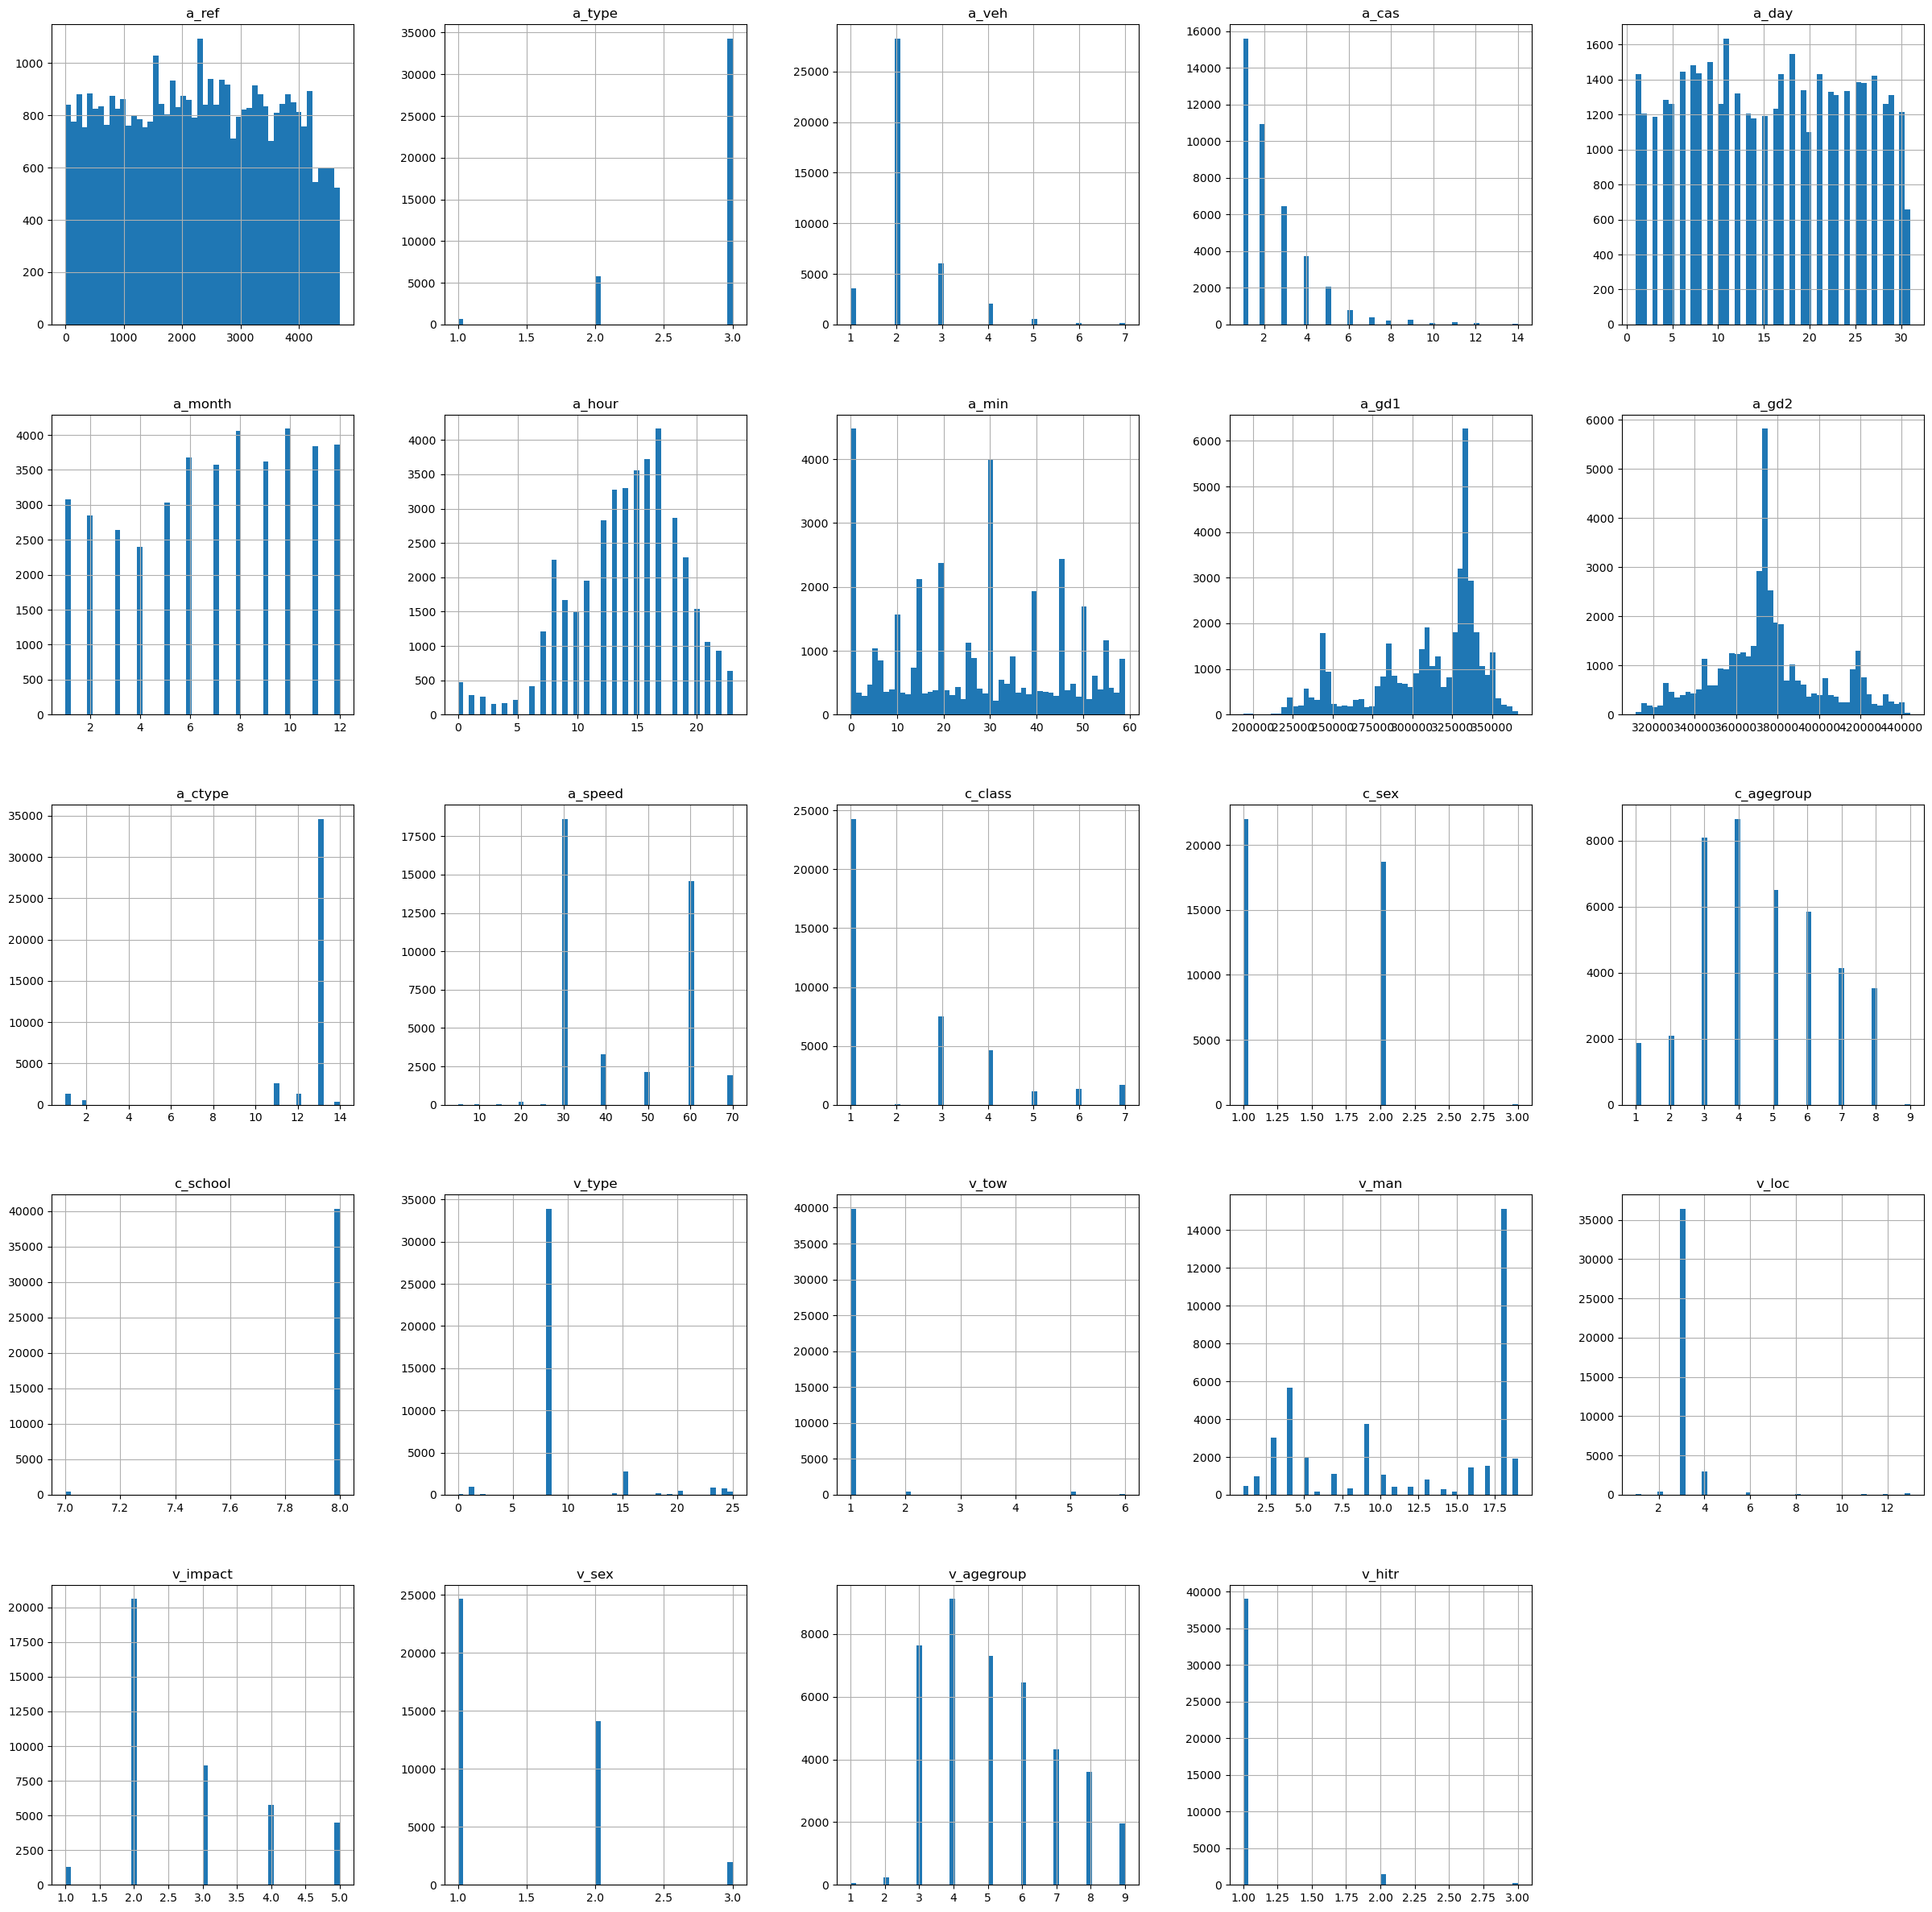

In [14]:
data_subset.hist(bins = 50, figsize = (30,30))

In [15]:
data_subset[['a_District']].value_counts()

a_District
BELC          9415
ARBC          4127
NEMD          3945
DCST          3464
LISC          3440
ANTN          3091
ARND          3043
CCGL          2869
MIDU          2867
MEAN          2369
FERO          2088
dtype: int64

In [16]:
data_subset[['a_wkday']].value_counts()

a_wkday
FRI        6794
THU        6278
WED        6032
TUE        6004
MON        5569
SAT        5537
SUN        4504
dtype: int64

In [17]:
missing_values_count = data_subset.isnull().sum()
print(missing_values_count)

a_ref            0
a_District       0
a_type           0
a_veh            0
a_cas            0
a_wkday          0
a_day            0
a_month          0
a_hour           0
a_min            0
a_gd1            0
a_gd2            0
a_ctype          0
a_speed          0
c_class          0
c_sex            0
c_agegroup       0
c_school         0
c_vtype       1150
v_type           0
v_tow            0
v_man            0
v_loc            0
v_impact         0
v_sex            0
v_agegroup       0
v_hitr           0
dtype: int64


# Handling remaining missing data with mean

In [20]:
# Replace missing values with the mean
data_subset['c_vtype'] = pd.to_numeric(data_subset['c_vtype'], errors='coerce')

mean_value = data_subset['c_vtype'].mean()

data_subset['c_vtype'].fillna(mean_value, inplace=True)

/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_13875/1805858734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['c_vtype'] = pd.to_numeric(data_subset['c_vtype'], errors='coerce')
/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_13875/1805858734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['c_vtype'].fillna(mean_value, inplace=True)


In [18]:
data_subset[['c_vtype']].value_counts()

c_vtype
8          22556
8          10531
15          1294
1           1182
5            716
1            528
15           527
20           422
5            294
2            184
20           159
4            138
18           124
14           108
17           106
23            96
24            90
25            73
4             57
24            53
14            37
25            36
19            36
18            31
17            31
6             28
2             27
21            22
23            20
22            20
9             14
7              8
9              6
6              4
19             4
16             4
7              2
dtype: int64

In [21]:
#Displaying null values
missing_values_count = data_subset.isnull().sum()
print(missing_values_count)

a_ref         0
a_District    0
a_type        0
a_veh         0
a_cas         0
a_wkday       0
a_day         0
a_month       0
a_hour        0
a_min         0
a_gd1         0
a_gd2         0
a_ctype       0
a_speed       0
c_class       0
c_sex         0
c_agegroup    0
c_school      0
c_vtype       0
v_type        0
v_tow         0
v_man         0
v_loc         0
v_impact      0
v_sex         0
v_agegroup    0
v_hitr        0
dtype: int64


# Encoding

In [22]:
# a_wkday ordinal encoding
a_wkday_map = {"MON": 1, "TUE": 2, "WED": 3 ,"THU": 4, "FRI": 5, "SAT": 6 , "SUN": 7}

# perform ordinal encoding 
data_subset['a_wkday'] = data_subset['a_wkday'].map(a_wkday_map)

/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_13875/3420815004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['a_wkday'] = data_subset['a_wkday'].map(a_wkday_map)


In [23]:
# a_District one-hot encoding
data_subset_encoded = pd.get_dummies(data_subset, columns=['a_District'], prefix=['a_District'])

In [24]:
#adding target variable to last column for inputing into ml models

# Extract the 'a_type' column
a_type_column = data_subset_encoded['a_type']

# Drop the 'a_type' column from the DataFrame
data_subset_encoded = data_subset_encoded.drop(columns=['a_type'])

# Add the 'a_type' column as the last column
data_subset_encoded['a_type'] = a_type_column

In [25]:
data_subset_encoded

,a_ref,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,a_gd1,a_gd2,a_ctype,a_speed,c_class,c_sex,c_agegroup,c_school,c_vtype,v_type,v_tow,v_man,v_loc,v_impact,v_sex,v_agegroup,v_hitr,a_District_ANTN,a_District_ARBC,a_District_ARND,a_District_BELC,a_District_CCGL,a_District_DCST,a_District_FERO,a_District_LISC,a_District_MEAN,a_District_MIDU,a_District_NEMD,a_type
0,1,1,1,3,1,1,0,55,346543,367965,13,40,1,1,3,8,8.000000,8,1,18,3,2,1,3,1,0,0,1,0,0,0,0,0,0,0,0,3
1,2,4,1,3,1,1,2,20,335920,374406,13,30,1,1,7,8,8.000000,8,1,2,4,2,3,9,1,0,0,0,1,0,0,0,0,0,0,0,3
2,2,4,1,3,1,1,2,20,335920,374406,13,30,1,1,7,8,8.000000,8,1,2,4,5,3,9,1,0,0,0,1,0,0,0,0,0,0,0,3
3,2,4,1,3,1,1,2,20,335920,374406,13,30,1,1,7,8,8.000000,8,1,2,4,4,3,9,1,0,0,0,1,0,0,0,0,0,0,0,3
4,2,4,1,3,1,1,2,20,335920,374406,13,30,1,1,7,8,8.000000,8,1,18,4,2,1,7,2,0,0,0,1,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,4703,2,2,3,15,9,23,53,325598,378737,13,60,1,1,4,8,8.000000,8,1,7,3,1,1,4,1,1,0,0,0,0,0,0,0,0,0,0,2
40714,4703,2,2,3,15,9,23,53,325598,378737,13,60,1,1,4,8,8.000000,8,1,7,3,2,1,4,1,1,0,0,0,0,0,0,0,0,0,0,2
40715,4703,2,2,3,15,9,23,53,325598,378737,13,60,3,1,4,8,8.000000,8,1,7,3,1,1,4,1,1,0,0,0,0,0,0,0,0,0,0,2
40716,4703,2,2,3,15,9,23,53,325598,378737,13,60,3,1,4,8,8.000000,8,1,7,3,2,1,4,1,1,0,0,0,0,0,0,0,0,0,0,2


# Correlation of target variable

In [26]:
# Calculate the correlation of 'a_type' with all other columns
correlations = data_subset_encoded.corr()['a_type'].sort_values(ascending=False)

# Print the correlations
print(correlations)

a_type             1.000000
a_District_BELC    0.143366
c_sex              0.067084
v_impact           0.056038
v_sex              0.055016
a_gd1              0.049609
a_hour             0.037575
c_school           0.027029
v_hitr             0.025337
a_District_ANTN    0.019271
a_day              0.010267
a_District_DCST    0.010227
a_ref             -0.003961
a_month           -0.004670
a_District_LISC   -0.005229
a_gd2             -0.005324
a_wkday           -0.011422
v_loc             -0.012567
c_vtype           -0.012675
c_agegroup        -0.016957
v_agegroup        -0.017480
a_District_ARND   -0.018947
a_min             -0.019887
a_District_ARBC   -0.025439
a_District_NEMD   -0.026871
a_ctype           -0.035699
a_veh             -0.036961
a_District_CCGL   -0.039530
v_tow             -0.040988
a_District_MIDU   -0.047676
a_District_MEAN   -0.052225
a_District_FERO   -0.053502
v_type            -0.094640
c_class           -0.114754
v_man             -0.168165
a_cas             -0

# Output for ML models

In [27]:
#output for ML models
data_subset_encoded.to_csv("final_eda_output.csv", index=False) 